## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [1]:
import pandas as pd


# Creating data frame for training data.

with open('./UCI HAR Dataset/features.txt') as file1:
    lines1 = file1.readlines()

with open('./UCI HAR Dataset/train/X_train.txt', 'r') as file2:
    lines2 = file2.readlines()

with open('./UCI HAR Dataset/train/y_train.txt', 'r') as file3:
    lines3 = file3.readlines()
    
with open('./UCI HAR Dataset/train/subject_train.txt', 'r') as file4:
    lines4 = file4.readlines()
    
feature_labels = [line.strip().split()[1] for line in lines1]

x_train_feature_values = [line.strip().split() for line in lines2]

y_train = [line.strip().split() for line in lines3]

subject_train = [line.strip().split() for line in lines4]

df_features_train = pd.DataFrame(x_train_feature_values, columns=feature_labels).astype('float64')
df_subject_train = pd.DataFrame(subject_train, columns=['subject']).astype('int32')
df_activity_train = pd.DataFrame(y_train, columns=['activity']).astype('int32')

df_train = pd.concat([df_features_train, df_subject_train, df_activity_train], axis=1)


# Creating data frame for test data.

with open('./UCI HAR Dataset/test/X_test.txt', 'r') as file5:
    lines5 = file5.readlines()

with open('./UCI HAR Dataset/test/y_test.txt', 'r') as file6:
    lines6 = file6.readlines()
    
with open('./UCI HAR Dataset/test/subject_test.txt', 'r') as file7:
    lines7 = file7.readlines()

x_test_feature_values = [line.strip().split() for line in lines5]

y_test = [line.strip().split() for line in lines6]

subject_test = [line.strip().split() for line in lines7]

df_features_test = pd.DataFrame(x_test_feature_values, columns=feature_labels).astype('float64')
df_subject_test = pd.DataFrame(subject_test, columns=['subject']).astype('int32')
df_activity_test = pd.DataFrame(y_test, columns=['activity']).astype('int32')

df_test = pd.concat([df_features_test, df_subject_test, df_activity_test], axis=1)

In [2]:
df_train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,5
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,5
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,5
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,5


In [3]:
df_test.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,5
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,5
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,5
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,5


Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

In [4]:
# The initial data collected was time series data having accelerometer and gyrometer signals collected from 
# 30 individuals performing various activities at a frequency of 50 Hz for a time window of 2.5 sec. There is a 50% 
# overlap between the windows. From these signals various time and frequency domain, angle features were extracted
# and provided to us in the dataset.
# Finally, every row is a 561 feature vector and one target attribute activity which is a multi class label 
# indicating the label for the activity being performed.

# Since, the data is high dimensional data, it would be difficult to visualise all the pair plots and histograms. 
# Hence, we are choosing a subset of the data to perform the visualisation for the following features:

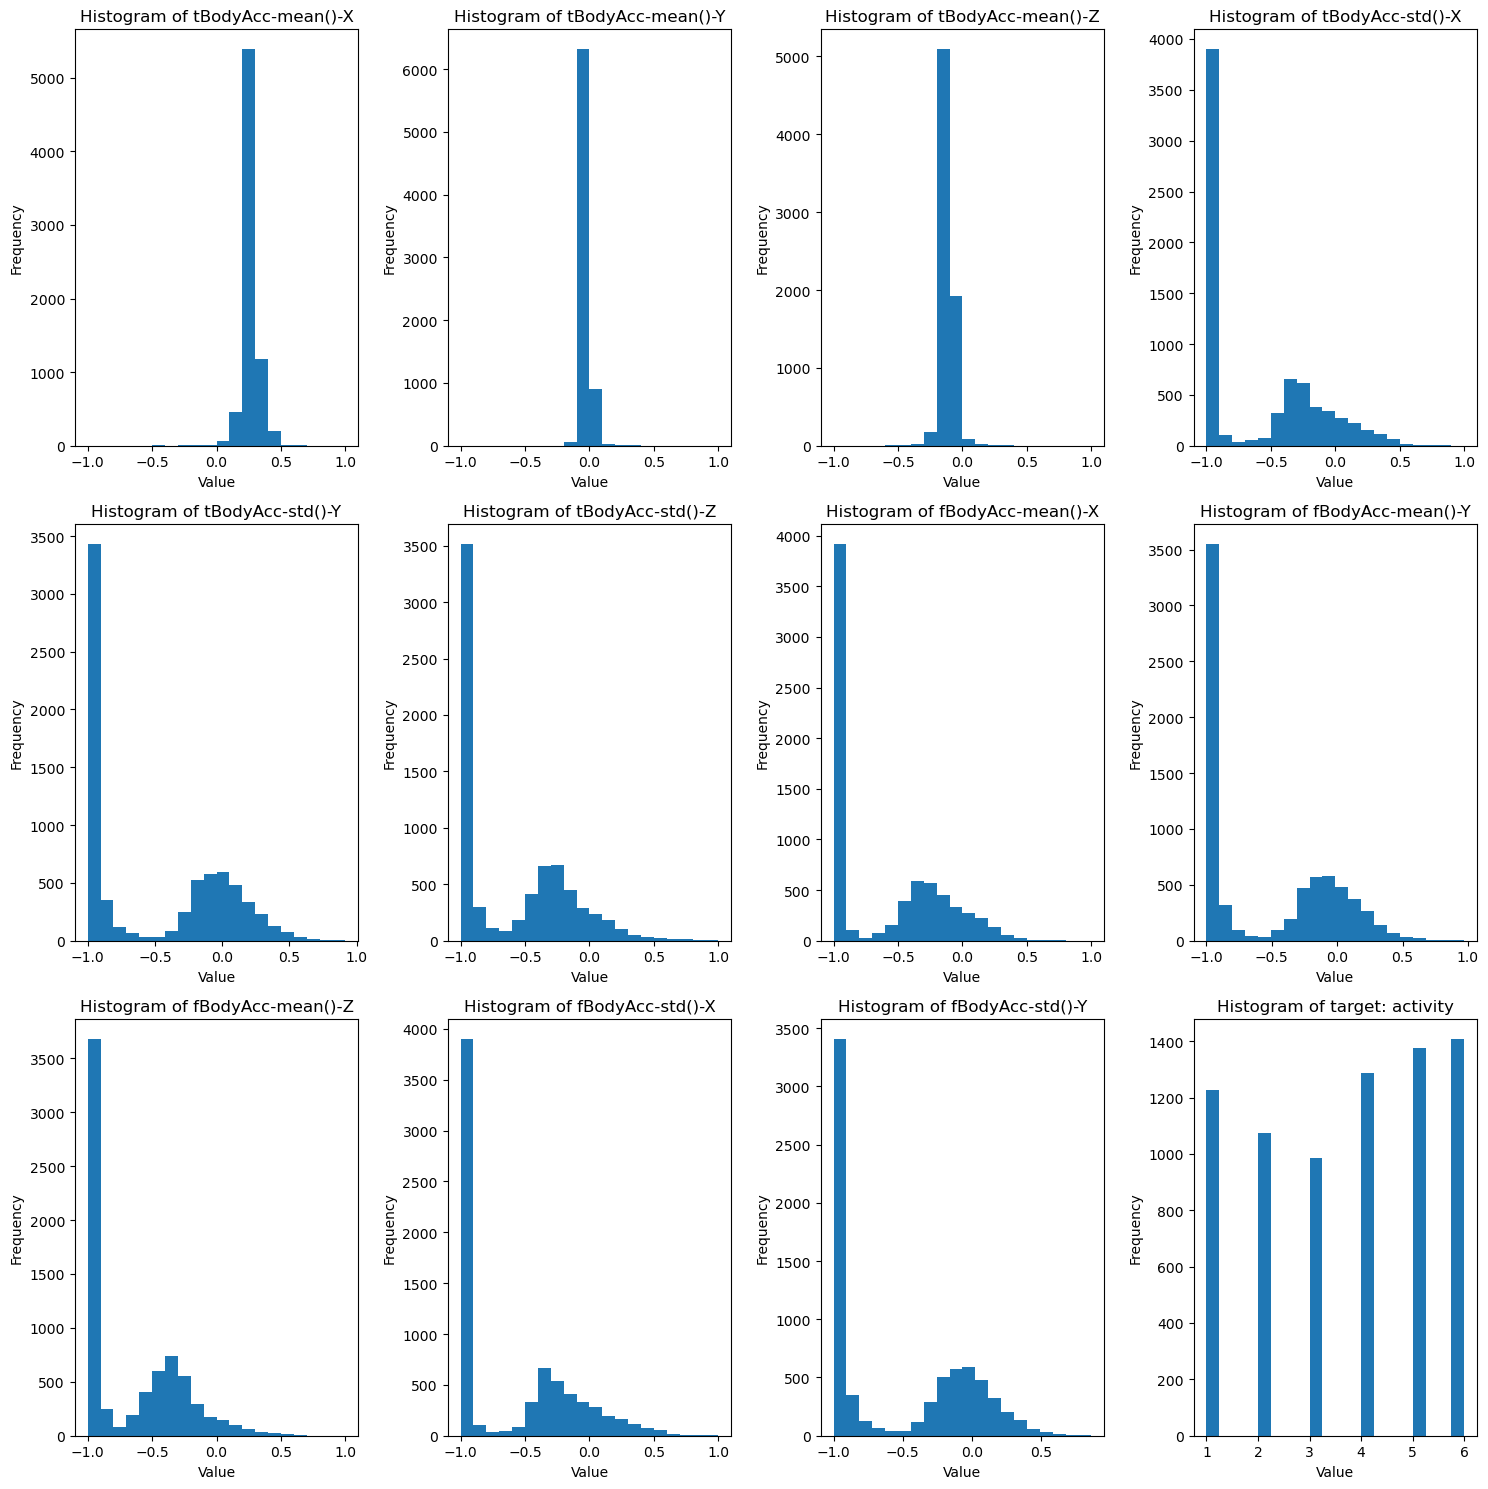

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Subset of features to plot histograms for
input_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 
                 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y', 
                  'fBodyAcc-mean()-Z', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y']

# Target variable (activity)
output_variable = 'activity'

# Set up the layout for the histograms
num_rows = 3  
num_cols = 4  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot histograms for input features
for i, feature in enumerate(input_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(df_train[feature], bins=20)  # Adjust the number of bins as needed
    ax.set_title('Histogram of ' + feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Plot histogram for the output variable
ax = axes[num_rows - 1, num_cols - 1]  
ax.hist(df_train[output_variable], bins=20)  
ax.set_title('Histogram of target: ' + output_variable)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [6]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [7]:
df_train.shape

(7352, 563)

In [8]:
df_test.shape

(2947, 563)

In [9]:
# Checking for duplicates in the train and test data.

print('Number of duplicates in train: {} \nNumber of duplicates in test: {}'.format(sum(df_train.duplicated()), sum(df_test.duplicated())))

Number of duplicates in train: 0 
Number of duplicates in test: 0


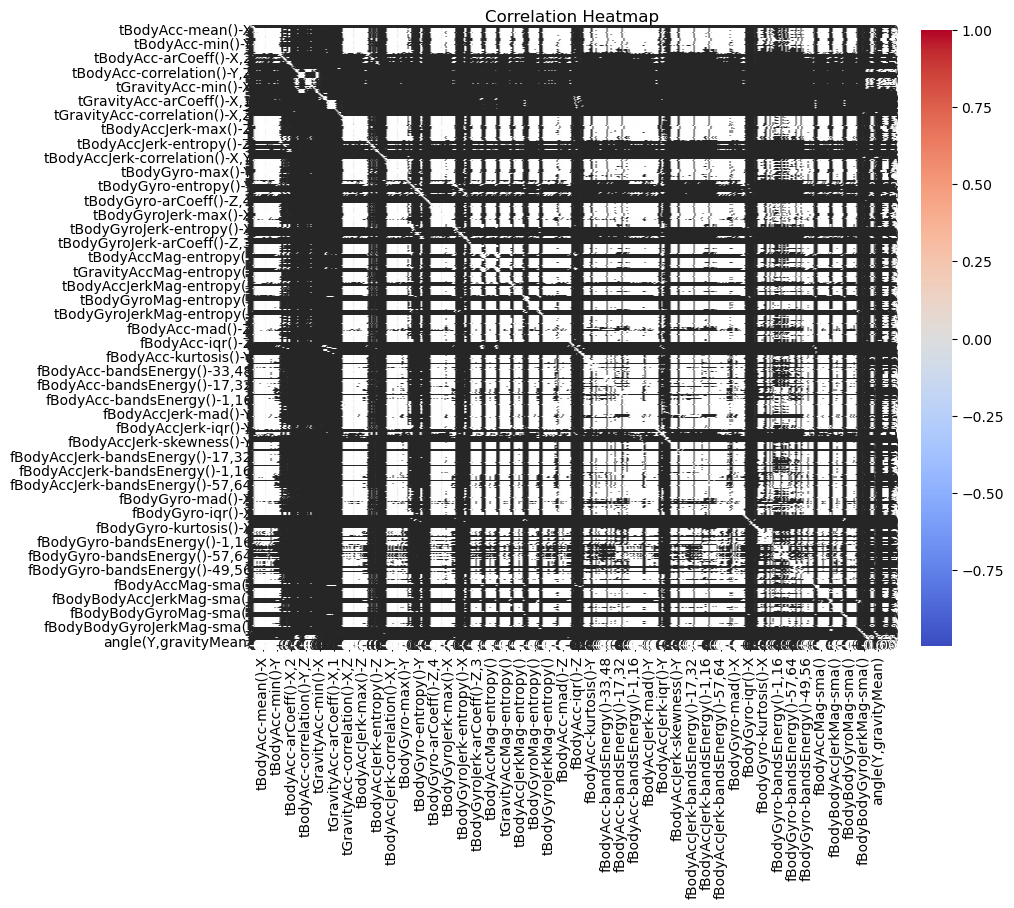

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_train.corr()

# Plot the heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 1.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.077s
[t-SNE] Iteration 50: error = 97.8896332, gradient norm = 0.0372335 (50 iterations in 2.627s)
[t-SNE] Iteration 100: error = 88.9444733, gradient norm = 0.0099923 (50 iterations in 1.599s)
[t-SNE] Iteration 150: error = 86.7406311, gradient norm = 0

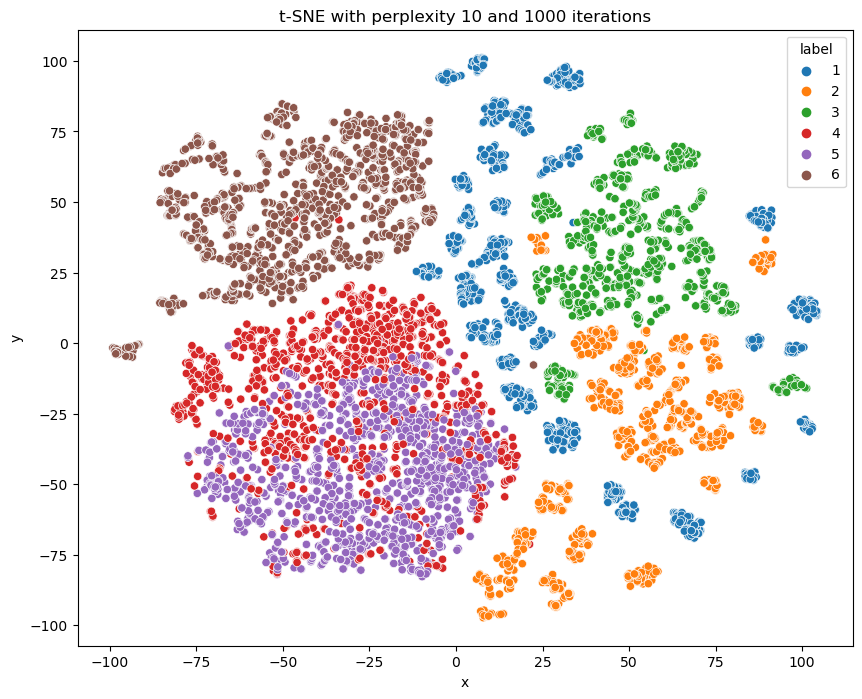

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

X_pre_tsne = df_train.drop(['subject', 'activity'], axis=1)
y_pre_tsne = df_train['activity']

# Perform t-SNE with perplexity 10
perplexity = 10
X_reduced = TSNE(n_components=2, verbose=2, perplexity=perplexity, n_iter=1000).fit_transform(X_pre_tsne)

# Prepare the data for seaborn
df = pd.DataFrame({'x': X_reduced[:,0], 'y': X_reduced[:,1], 'label': y_pre_tsne})

# Plot t-SNE 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='label', palette="tab10")
plt.title("t-SNE with perplexity 10 and 1000 iterations")
plt.show()


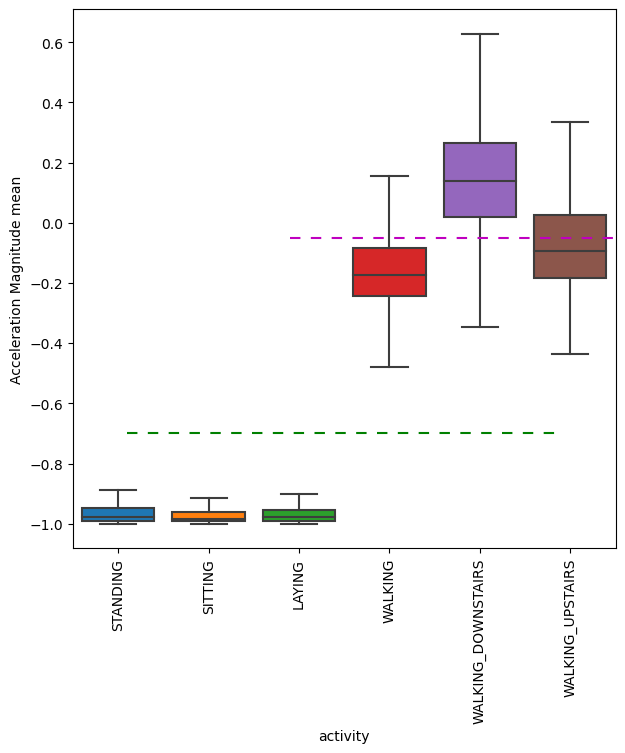

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a dictionary to map numerical labels to activity names
activity_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Replace numerical labels with activity names in the DataFrame
df_train['activity'] = df_train['activity'].map(activity_mapping)

# Plot the boxplot with activity names on the x-axis
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='tBodyAccMag-mean()', data=df_train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()


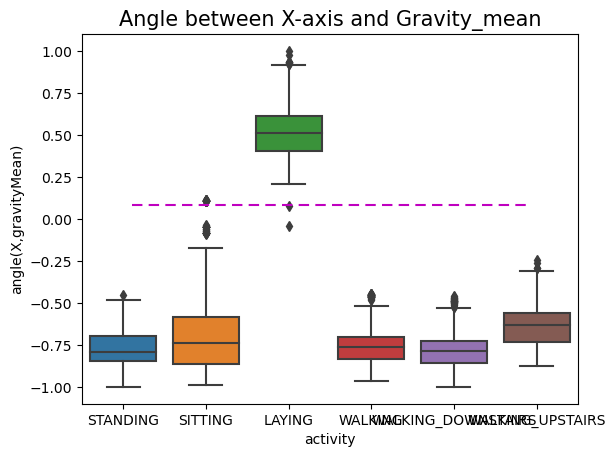

In [13]:
sns.boxplot(x='activity', y='angle(X,gravityMean)', data=df_train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.show()

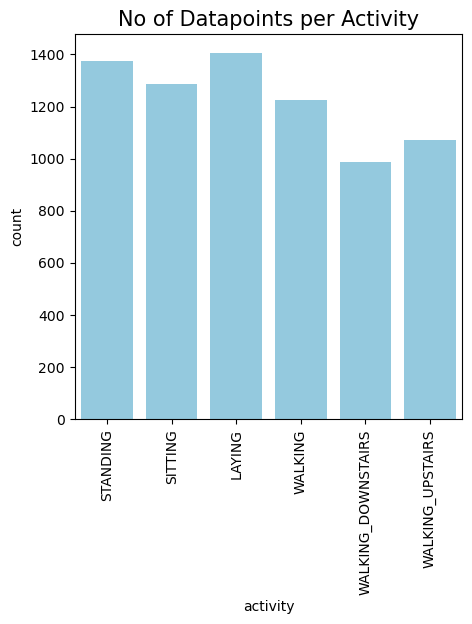

In [14]:
plt.figure(figsize=(5, 5))
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x='activity', data=df_train, color='skyblue') 
plt.xticks(rotation=90)
plt.show()


### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

`### Comment here`
 Comment on Your Data

1. There is no data imbalance. We have enough records for each class label.
2. (i) There are no null values and duplicate rows in the dataset. 
   (ii) The static activities like standing, sitting and laying can be easily differentiated from dynamic     activities like walking, walking upstairs and walking downstairs using tBodyAccMag-mean() feature. This is evident from the box plots.
   (iii) Laying can also be easily differentiated from other activities using angle(X,gravityMean)feature. This is also evident from the box plots.
   (iv) t-SNE shows that standing and sitting data points are intertwined between each other. Hence it would be difficult to differentiate them.